In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Here we are predicting the following famous Indian cricketers! 
# the first entry in list is left blank intentionally  as the folder names with training images start with 1 and 2 accordingly for these two cricketer images

subjects=["","MS Dhoni","Virat Kolhi"]

In [3]:
#CascadeClassifier helps us detect the face area in any image provided
# the steps are to first convert the image to gray scale as most functions need such input and then detect the faces using function detectMultiScale

lp = cv2.CascadeClassifier('C:/Users/sumi0717/AppData/Local/Continuum/anacondaFinal/pkgs/libopencv-3.4.1-h875b8b8_3/Library/etc/lbpcascades/lbpcascade_frontalface.xml')  

def detect_face(img):
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  #convert to gray scale as the default is BGR via opencv
    faces = lp.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5)
    
    if(len(faces)==0):
        return None,None
    
    x, y, w, h = faces[0]
    
    return gray[y:y+w, x:x+h], faces[0]


In [6]:
#Now we will first extract the training data stored in each folder s1 and s2 for two cricketers resp
#and extract the face area of each image so that the model can be trained on them later
#identity each face and append a numerical label example 1 or 2 will be assigned depending on their resp folders s1 and s2
#inner images in s1 and s2 are labelled as 1.png , 2.png and so on

faces=[]
labels=[]
    
def training_data(path):
    dirs = os.listdir(path)  #get dirs as s1 and s2 from main training path

    fig=plt.figure(figsize=(6,10))

    j=1
    for d in dirs:
        
        label = int(d.replace("s", "")) #extract folder no
        folder_inner = path + "/" + d
        images_inner=os.listdir(folder_inner)  
      

        for i in images_inner:   
            if j==13:     
                break
                
            img_path=folder_inner+"/"+i
            image = cv2.imread(img_path)
           
            
            fig.add_subplot(6,2,j)

            plt.imshow(image)
            j=j+1
       
            face, rect = detect_face(image)
            faces.append(face)
            labels.append(label)
            
            
    return faces,labels
        

Total faces:  12
Total labels:  12


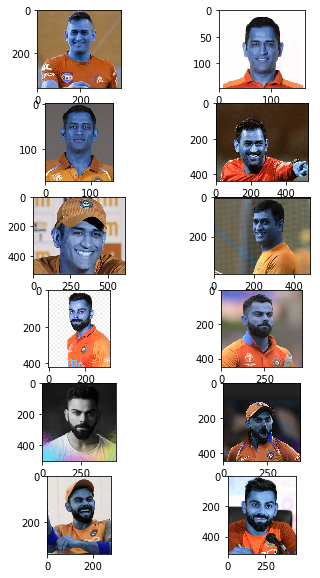

In [7]:
#Lets see our training images which the function call will display

s,labels= training_data('C:/Users/sumi0717/training')
print("Total faces: ", len(faces))
print("Total labels: ", len(labels))

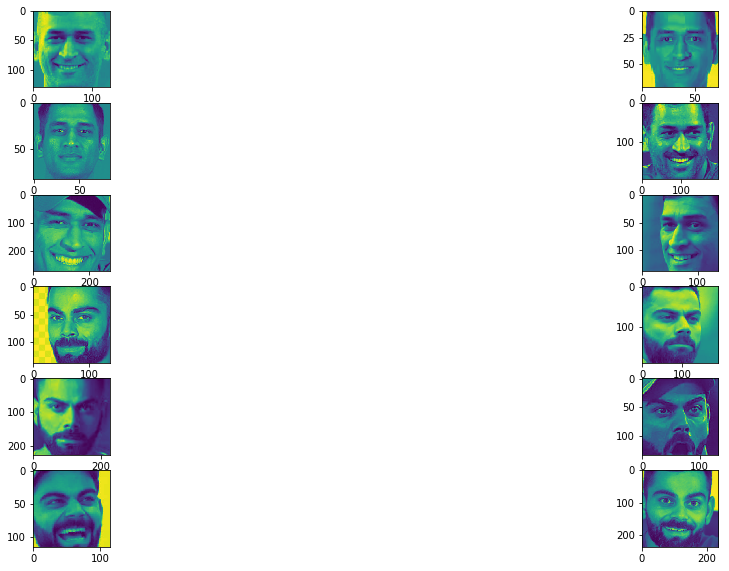

In [9]:
#Now lets observe the faces extracted by CascadeClassifier's method

fig1=plt.figure(figsize=(20,20))

p=1
for f in faces:
        
        fig1.add_subplot(12,2,p)
        plt.imshow(f)
        p=p+1
        

In [10]:
#create our opencv recognizer object and train it on our data in next step
recognizer = cv2.face.LBPHFaceRecognizer_create()

In [12]:
#Now that we have initialized our face recognizer and we also have prepared our training data, it's time to train. 
#We will do that by calling the methodtrain(faces-vector, labels-vector) of face recognizer.

recognizer.train(faces, np.array(labels))

In [21]:
#Lets use the recatangle and text to display the prediction output

def draw_rectangle(img, rect):
    (x, y, w, h) = rect
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

In [22]:
def draw_text(img, text, x, y):
    cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 255, 0), 2)

In [23]:
#our predicting steps will be the same ; first detect the facial area and then predict using recog

def predict_it(test_img):
    
    img = test_img.copy()
    face, rect = detect_face(img)
    label = recognizer.predict(face)  #it returns the label predicted
    print(label)
    label_text = subjects[int(label[0])]
    draw_rectangle(img, rect)
    draw_text(img, label_text, rect[0], rect[1]-5)
    return img

 

In [18]:
#Lets read our test sample

test_img1 = cv2.imread("C:/users/sumi0717/test/test_mahi.png")


In [19]:
prediction=predict_it(test_img1)

(1, 56.37656485214535)


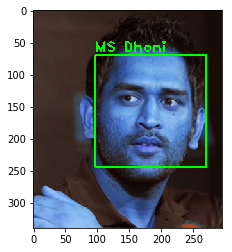

In [24]:
#And here is the final predicted result 

plt.imshow(prediction)